# LSHTM Reff comparisons

Here I compare the LSHTM Reff estimates produced by Price et al at different time points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-poster')
from datetime import datetime as dt
from Reff_functions import *
from Reff_constants import *

In [9]:
df_R_old = read_in_Reff()

def read_in_LSHTM():
    """
    Read in new LSHTM Reff csv from David Price et al
    """
    import pandas as pd
    path = "../data/LSHTM_Reff_estimates/Reff_LSHTM.csv"
    return pd.read_csv(path,parse_dates=['date','date_of_analysis'])
    
df_L_R = read_in_LSHTM()
df_cases = read_in_cases()

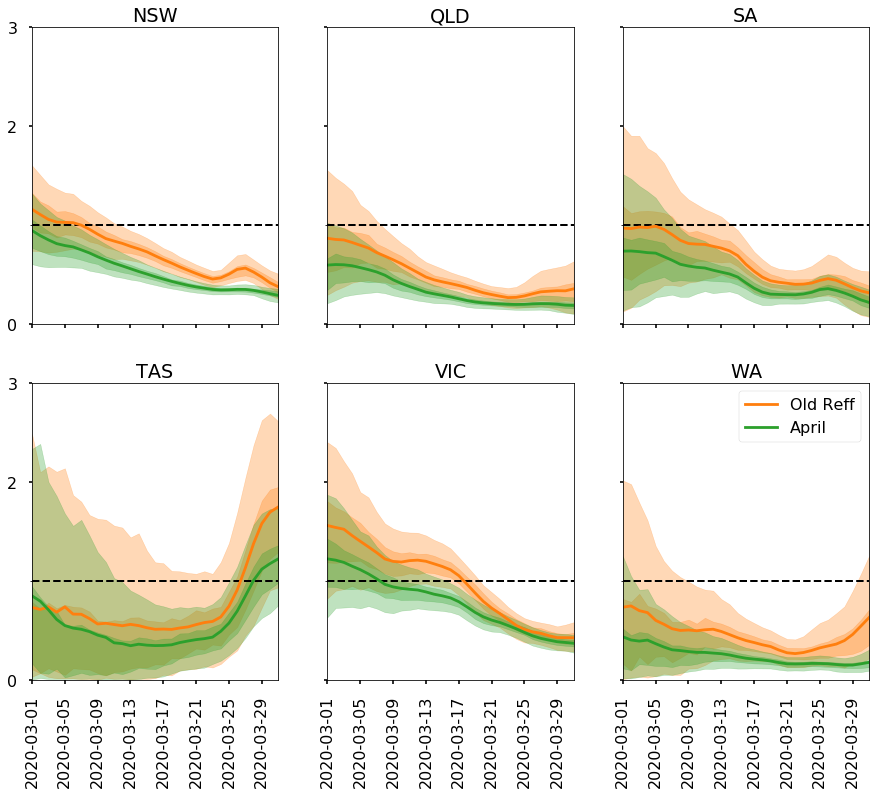

In [34]:
#plot each estimate
fig, ax = plt.subplots(figsize=(15,12), ncols=3,nrows=2, sharex=True, sharey=True)

states = [initial[1] for initial in sorted(list(states_initials.items()))]

states.remove('NT')
states.remove('ACT')
date_filter = pd.date_range(start='2020-03-01',end='2020-03-31')
    
for i, state in enumerate(states):
    
    row, col = i//3, i%3
    
    #filters
    df_state = df_R_old.loc[(df_R_old.state==state) & (df_R_old.date.isin(date_filter))]
    
    df_april = df_L_R.loc[(df_L_R.date_of_analysis=='2020-04-26')&(df_L_R.state==state)]
    df_april = df_april.loc[df_april.date.isin(date_filter)]
    
    df_june = df_L_R.loc[(df_L_R.date_of_analysis=='2020-06-28')&(df_L_R.state==state)]
    df_june = df_june.loc[(df_june.date.isin(date_filter))]
    
    plot_dfs ={
        'Old Reff':df_state,
        'April': df_april,
        'June':df_june,
    }
    
    #plot old estimate
    ax[row,col].plot(df_state.date, df_state['median'], label='Old Reff',color='C1')
    ax[row,col].fill_between(df_state.date, df_state['bottom'], df_state['top'],color='C1', alpha=0.3)
    ax[row,col].fill_between(df_state.date, df_state['lower'], df_state['upper'],color='C1', alpha=0.3)
    
    #plot april estimate
    ax[row,col].plot(df_april.date, df_april['median'], label='April',color='C2')
    ax[row,col].fill_between(df_april.date, df_april['bottom'], df_april['top'],color='C2', alpha=0.3)
    ax[row,col].fill_between(df_april.date, df_april['lower'], df_april['upper'],color='C2', alpha=0.3)
    
    #plot June estimate
    
    
    
    #formatting
    ax[row,col].set_title(state)

    
    #grid line at R_eff =1
    ax[i//3,i%3].set_yticks([1],minor=True,)
    ax[i//3,i%3].set_yticks([0,2,3],minor=False)
    ax[i//3,i%3].set_yticklabels([0,2,3],minor=False)
    ax[i//3,i%3].yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
    ax[i//3,i%3].set_ylim((0,3))
    
    if i//3==1:
        ax[i//3,i%3].tick_params(axis='x',rotation=90)
        ax[row,col].set_xlim((date_filter[0],date_filter[-1]))
    
plt.legend()
plt.show()

In [5]:
df_L_R.loc[df_L_R.date=='2020-04-01']

,type,date,bottom,top,lower,upper,median,mean,std,prob_control,mean_window,sd_window,confidence,date_onset,state,date_of_analysis
44,nowcast,2020-04-01,0.090155,0.318583,0.132283,0.211470,0.186195,0.202262,0.076417,1.000000,3.291574,2.093373,0.956829,2020-04-06,WA,2020-04-26
116,nowcast,2020-04-01,0.082086,0.235827,0.113649,0.173065,0.152133,0.159809,0.051359,1.000000,3.901895,1.401370,0.999341,2020-04-06,WA,2020-06-28
282,nowcast,2020-04-01,0.255074,0.458582,0.321864,0.392045,0.360230,0.363059,0.061679,1.000000,3.332000,2.290480,0.983697,2020-04-06,VIC,2020-04-26
377,nowcast,2020-04-01,0.188513,0.392135,0.257913,0.338297,0.293836,0.295109,0.062803,1.000000,1.891892,1.457622,1.000000,2020-04-06,VIC,2020-06-28
503,nowcast,2020-04-01,0.795424,1.758542,1.014655,1.381254,1.237923,1.271691,0.299482,0.171183,2.292214,1.501861,0.985408,2020-04-06,TAS,2020-04-26
570,nowcast,2020-04-01,0.738496,1.762176,0.989379,1.396353,1.212120,1.239405,0.318857,0.230657,1.639208,1.073562,0.996467,2020-04-06,TAS,2020-06-28
687,nowcast,2020-04-01,0.066619,0.345854,0.151379,0.264746,0.209475,0.217869,0.094128,1.000000,3.036072,2.124660,0.858615,2020-04-06,SA,2020-04-26
780,nowcast,2020-04-01,0.064616,0.349924,0.145794,0.258244,0.207570,0.216627,0.092493,1.000000,2.830831,1.543707,0.829344,2020-04-06,SA,2020-06-28
883,nowcast,2020-04-01,0.112090,0.310833,0.159535,0.228099,0.200094,0.209679,0.064182,1.000000,3.181189,2.149247,0.979978,2020-04-06,QLD,2020-04-26
959,nowcast,2020-04-01,0.099110,0.282626,0.146386,0.209496,0.184907,0.192942,0.058652,1.000000,3.555396,2.227401,1.000000,2020-04-06,QLD,2020-06-28


In [10]:
df_state = df_R_old.loc[df_R_old.state=='SA']
df_state

,type,date,bottom,top,lower,upper,median,mean,std,prob_control,mean_window,sd_window,confidence,date_onset,state
235,nowcast,2020-01-21,0.259316,3.279421,1.119387,2.345085,1.668290,1.824104,1.118732,0.200000,4.500000,0.512989,1.000000,2020-01-26,SA
236,nowcast,2020-01-22,0.144080,4.602783,0.600378,2.034149,1.919519,2.252452,1.670315,0.250000,4.250000,0.839719,1.000000,2020-01-27,SA
237,nowcast,2020-01-23,0.326230,5.859900,0.401647,1.798402,1.730573,2.509421,2.222056,0.240000,3.800000,1.178030,1.000000,2020-01-28,SA
238,nowcast,2020-01-24,0.170466,4.171728,0.334870,1.639634,1.448808,2.025924,1.886282,0.355556,4.444444,1.430888,1.000000,2020-01-29,SA
239,nowcast,2020-01-25,0.020274,4.312477,0.131179,1.269310,1.259467,1.878525,1.761090,0.383333,4.333333,1.252449,1.000000,2020-01-30,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,nowcast,2020-04-07,0.051556,2.113123,0.146791,0.697176,0.641918,1.035570,1.325923,0.687751,3.309398,2.054374,0.565606,2020-04-12,SA
313,nowcast,2020-04-08,0.019478,2.815038,0.152954,0.827568,0.765397,1.270009,1.502148,0.612190,3.306998,2.057558,0.507986,2020-04-13,SA
314,nowcast,2020-04-09,0.042448,2.966941,0.211436,0.952018,0.842175,1.394134,1.817330,0.579262,3.333333,2.066051,0.464270,2020-04-14,SA
315,nowcast,2020-04-10,0.029920,3.611842,0.160153,1.078391,1.009180,1.655480,1.980836,0.496312,3.337589,2.051837,0.401190,2020-04-15,SA


In [27]:
df_R_old.date.isin(date_filter)

0      False
1      False
2      False
3      False
4      False
       ...  
516    False
517    False
518    False
519    False
520    False
Name: date, Length: 521, dtype: bool

In [25]:
date_filter

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31'],
              dtype='datetime64[ns]', freq='D')